In [1]:
current_high_score = 0.75707
dataset_num = 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
train = pd.read_csv(f'../../data/preproc_data/train_{dataset_num}_1.csv')
test = pd.read_csv(f'../../data/preproc_data/test_{dataset_num}_1.csv')

In [5]:
X_train = train.drop(columns=['Transported', 'PassengerId'])
y_train = pd.DataFrame(train['Transported'])

X_train.head()

HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_0.0  \
0               0.0                1.0              0.0            1.0   
1               1.0                0.0              0.0            1.0   
2               0.0                1.0              0.0            1.0   
3               0.0                1.0              0.0            1.0   
4               1.0                0.0              0.0            1.0   

   CryoSleep_1.0  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0            0.0                      0.0                        0.0   
1            0.0                      0.0                        0.0   
2            0.0                      0.0                        0.0   
3            0.0                      0.0                        0.0   
4            0.0                      0.0                        0.0   

   Destination_TRAPPIST-1e  VIP_False  VIP_True  ...  AgeGroup_3  AgeGroup_4  \
0                      1.0        1.0       0.0  ...         0.0         1.0   
1                      1.0        1.0       0.0  ...         0.0         0.0   
2                      1.0        0.0       1.0  ...         0.0         0.0   
3                      1.0        1.0       0.0  ...         0.0         1.0   
4                      1.0        1.0       0.0  ...         0.0         0.0   

   AgeGroup_5  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0         0.0     0.000000   0.000000      0.000000  0.000000  0.000000   
1         0.0     4.700480   2.302585      3.258097  6.309918  3.806662   
2         1.0     3.784190   8.182280      0.000000  8.812248  3.912023   
3         0.0     0.000000   7.157735      5.918894  8.110728  5.267858   
4         0.0     5.717028   4.262680      5.023881  6.338594  1.098612   

   GroupSize  Expenditure  
0          1     0.000000  
1          1     6.602588  
2          2     9.248021  
3          2     8.551981  
4          1     6.995766  

[5 rows x 42 columns]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6954, 42), (1739, 42), (6954, 1), (1739, 1))

In [7]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1, 1],
}

# Initialize XGBClassifier
xgb_clf = XGBClassifier(eval_metric='logloss')

# Perform GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, 
                               cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Best model and parameters
xgb_best_model = xgb_grid_search.best_estimator_
best_params = xgb_grid_search.best_params_

# Make predictions
xgb_pred = xgb_best_model.predict(X_test)

# Evaluation
xgb_accuracy = accuracy_score(y_test, xgb_pred)
conf_matrix = confusion_matrix(y_test, xgb_pred)
class_report = classification_report(y_test, xgb_pred)


Fitting 3 folds for each of 12960 candidates, totalling 38880 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, s

In [10]:

# Display results
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {xgb_accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500, 'reg_alpha': 0.1, 'subsample': 1.0}
Accuracy: 0.8028
Confusion Matrix:
[[667 194]
 [149 729]]
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.77      0.80       861
        True       0.79      0.83      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



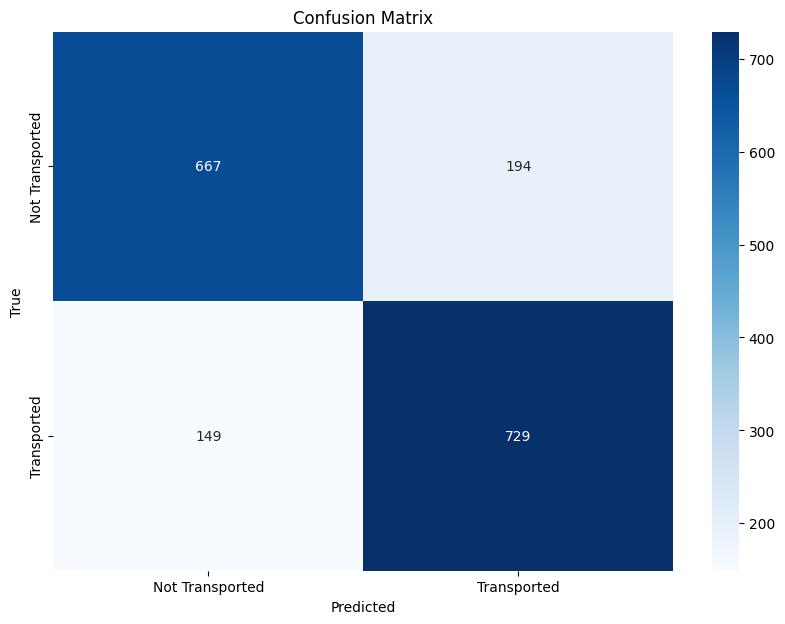

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Transported', 'Transported'], 
            yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:
test_no_id = test.copy().drop(columns='PassengerId')
predictions = xgb_best_model.predict(test_no_id)

predictions_bool = predictions == 1

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': predictions_bool
})

submission.to_csv(f'../../data/submissions/data_{dataset_num}/2_1/XGB_train_test_data_{dataset_num}_1.csv', index=False)
display("Submission file generated successfully.")


'Submission file generated successfully.'